In [15]:
import matplotlib.pyplot as plt
import numpy as np
from Q_Learning import evaluate, train, make_QTables
from extended_pd import parallel_env

In [16]:
env = parallel_env()

# Values of gamma to test
gamma_values = [0.8, 0.9, 0.95, 0.99]

# Lists to store results for each gamma
mean_rewards_list = []

In [17]:
for gamma in gamma_values:
    alfa = 0.01
    adecay = 0.0001
    env = parallel_env()
    observations, infos = env.reset()
    qtables = make_QTables(env, gamma)
    mean_reward = train(env, 1000, 0, 0.2, 0.000006, 100, qtables, gamma, alfa, adecay)
    # mean_reward, std_reward = evaluate(env, 100, 100, qtables)
    print(mean_reward)
    
    # Store mean reward for later plotting
    mean_rewards_list.append(mean_reward)

    print(f"Gamma={gamma}, Mean_reward for Agent 1: {np.mean(mean_reward[:, 0]):.2f}")
    print(f"Gamma={gamma}, Mean_reward for Agent 2: {np.mean(mean_reward[:, 1]):.2f}")
    print(f"Gamma={gamma}, Mean_reward for Agent 3: {np.mean(mean_reward[:, 2]):.2f}")


[array([[[[1.26710404, 1.1553924 , 1.13679535, 1.0686081 ],
         [1.13501139, 1.1203355 , 1.1043657 , 1.09648527],
         [1.13338753, 1.12885506, 1.12993183, 1.13038016],
         [1.262468  , 1.26044418, 1.26340119, 1.26094955]],

        [[1.14818755, 1.13474847, 1.13712009, 1.11310922],
         [1.76059038, 1.58854496, 1.56033979, 1.52937476],
         [1.32661666, 1.32739603, 1.32471188, 1.32734435],
         [1.58115331, 1.58007978, 1.57686622, 1.57874351]],

        [[1.27023564, 1.19994089, 1.19457302, 1.19307238],
         [1.42709498, 1.42558126, 1.42851586, 1.43036117],
         [1.31044316, 1.17770091, 1.24432944, 1.10804023],
         [1.41977857, 1.41669199, 1.4171088 , 1.41301889]],

        [[1.27982906, 1.22194637, 1.19237533, 1.21472423],
         [1.48076396, 1.47721867, 1.47776268, 1.48047401],
         [1.42025634, 1.41986585, 1.41833667, 1.41744389],
         [1.55634307, 1.55436821, 1.55009363, 1.55212217]]],


       [[[1.20412013, 1.04490477, 1.101098  ,

TypeError: list indices must be integers or slices, not tuple

In [ ]:
# Transpose mean_rewards_list for plotting
mean_rewards_array = np.array(mean_rewards_list).T

In [ ]:
mean_rewards_list

[array([43.44888889, 93.41222222, 76.66222222]),
 array([16.94666667, 16.84333333, 17.03      ]),
 array([38.90777778, 54.70111111, 38.81777778]),
 array([27.71666667, 11.46333333, 27.71      ])]

In [ ]:
mean_rewards_array

array([[43.44888889, 16.94666667, 38.90777778, 27.71666667],
       [93.41222222, 16.84333333, 54.70111111, 11.46333333],
       [76.66222222, 17.03      , 38.81777778, 27.71      ]])

ValueError: x and y must have same first dimension, but have shapes (10000,) and (3,)

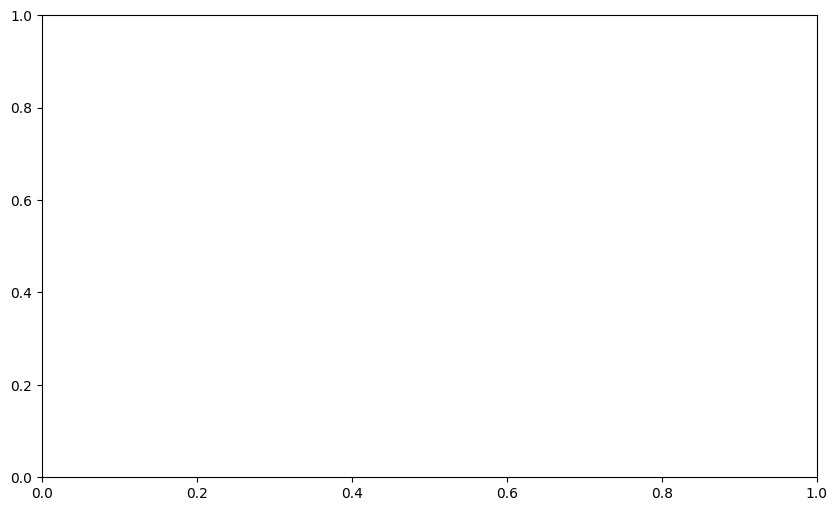

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))

for i in range(len(gamma_values)):
    plt.plot(range(1, 10001), mean_rewards_array[:, i], label=f'Gamma={gamma_values[i]}')

plt.title('Q-learning Performance with Different Gamma Values')
plt.xlabel('Number of Training Episodes')
plt.ylabel('Average Payoffs')
plt.legend()
plt.show()